In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from numpy import asarray
from sklearn .preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


DATA CLEANING

In [ ]:
 print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
df.shape

(545, 13)

Exploration of the Data

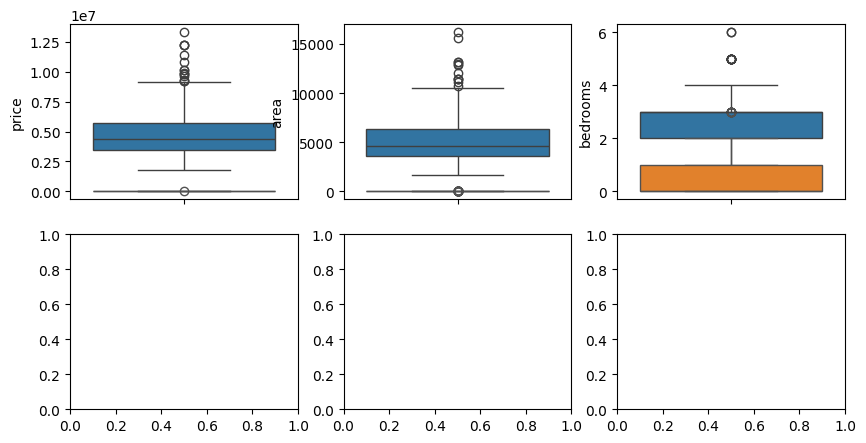

In [ ]:
fig, axs=plt.subplots(2,3,figsize=(10,5))
plt1=sns.boxplot(df['price'],ax=axs[0,0])
plt2=sns.boxplot(df['area'],ax=axs[0,1])
plt3=sns.boxplot(df['bedrooms'],ax=axs[0,2])
plt1=sns.boxplot(df['bathrooms'],ax=axs[0,0])
plt2=sns.boxplot(df['stories'],ax=axs[0,1])
plt3=sns.boxplot(df['parking'],ax=axs[0,2])

Hence, price and area have outlier values


Dropping these outlier values as the data is sufficient for analysisng



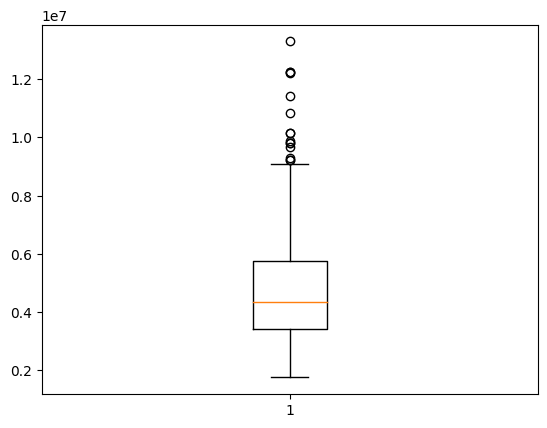

In [ ]:
plt.boxplot(df.price)
Q1=df.price.quantile(0.25)
Q3=df.price.quantile(0.75)
IQR= Q3-Q1
housing=df[(df.price==Q1-1.5*IQR)&(df.price==Q3+1.5*IQR)]

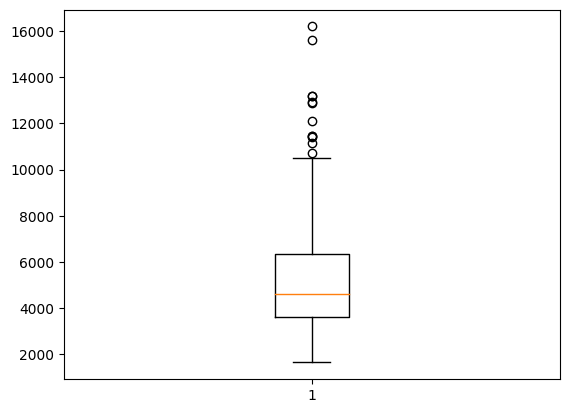

In [ ]:
plt.boxplot(df.area)
Q1=df.area.quantile(0.25)
Q3=df.area.quantile(0.75)
IQR= Q3-Q1
housing=df[(df.price==Q1-1.5*IQR)&(df.price==Q3+1.5*IQR)]

EDA

Showing all the realtions between the variables using seaborn

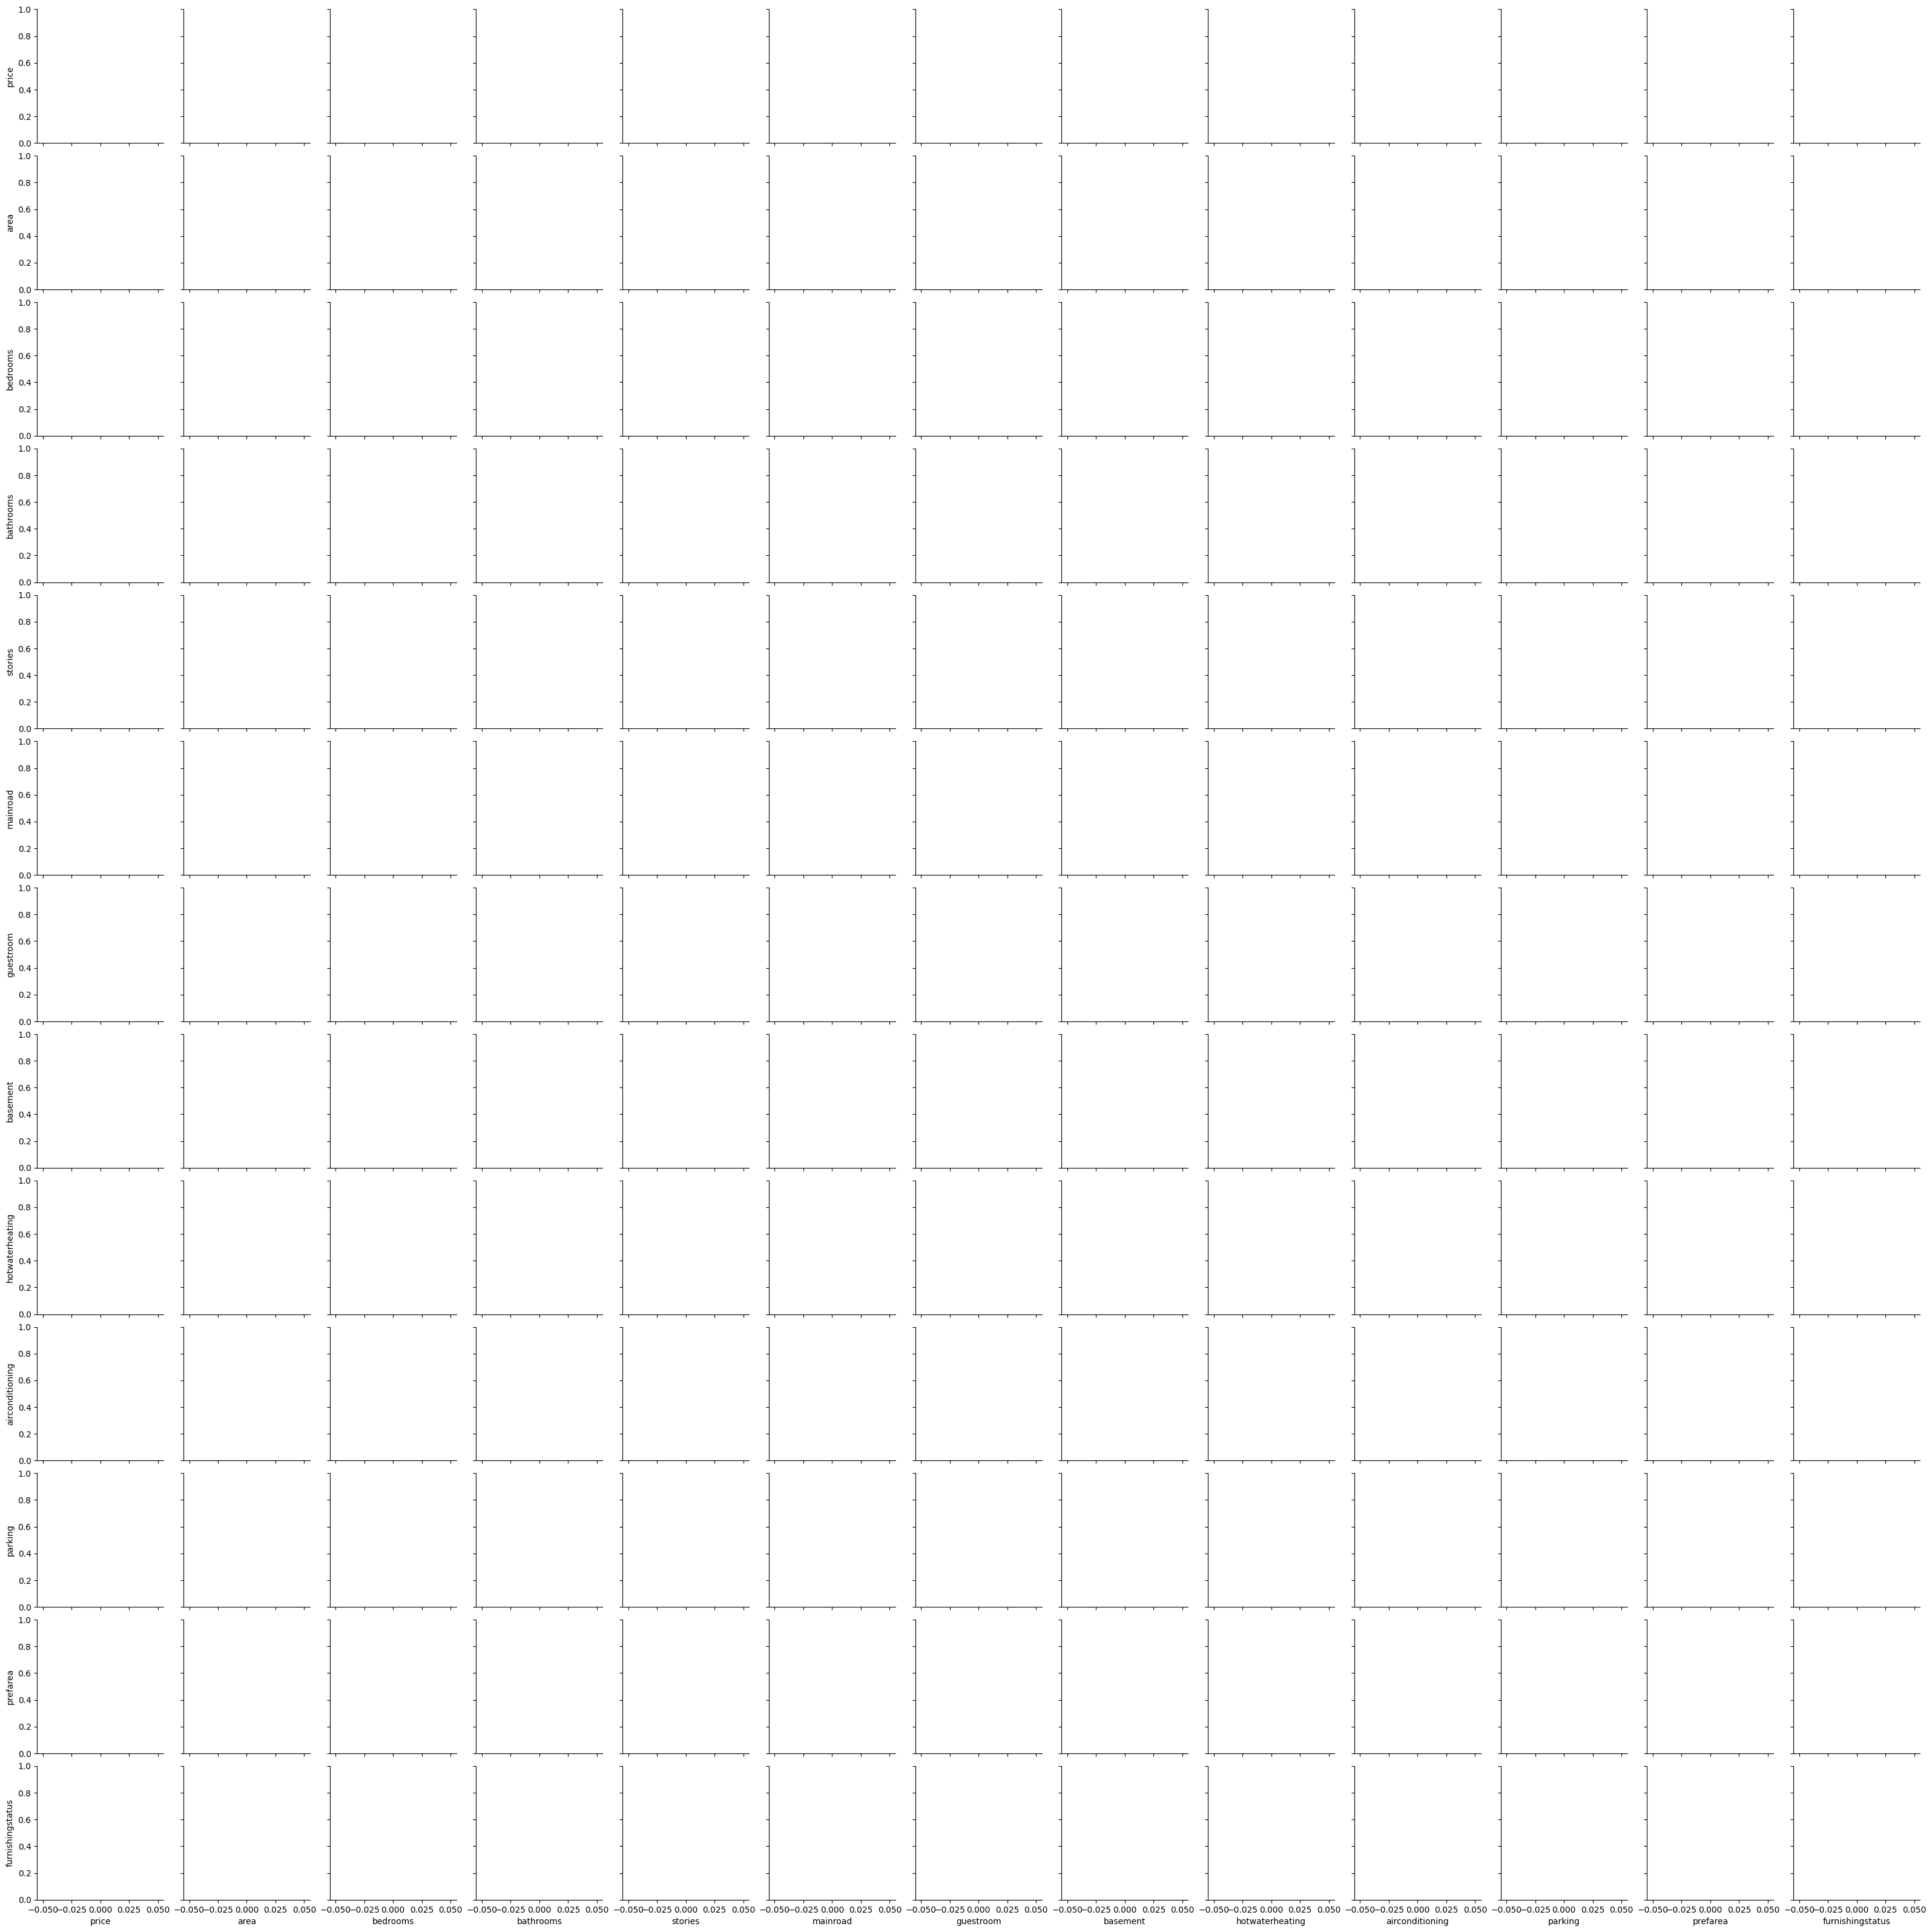

In [ ]:
sns.pairplot(housing)
plt.show()

These are other categorical as well in dataset

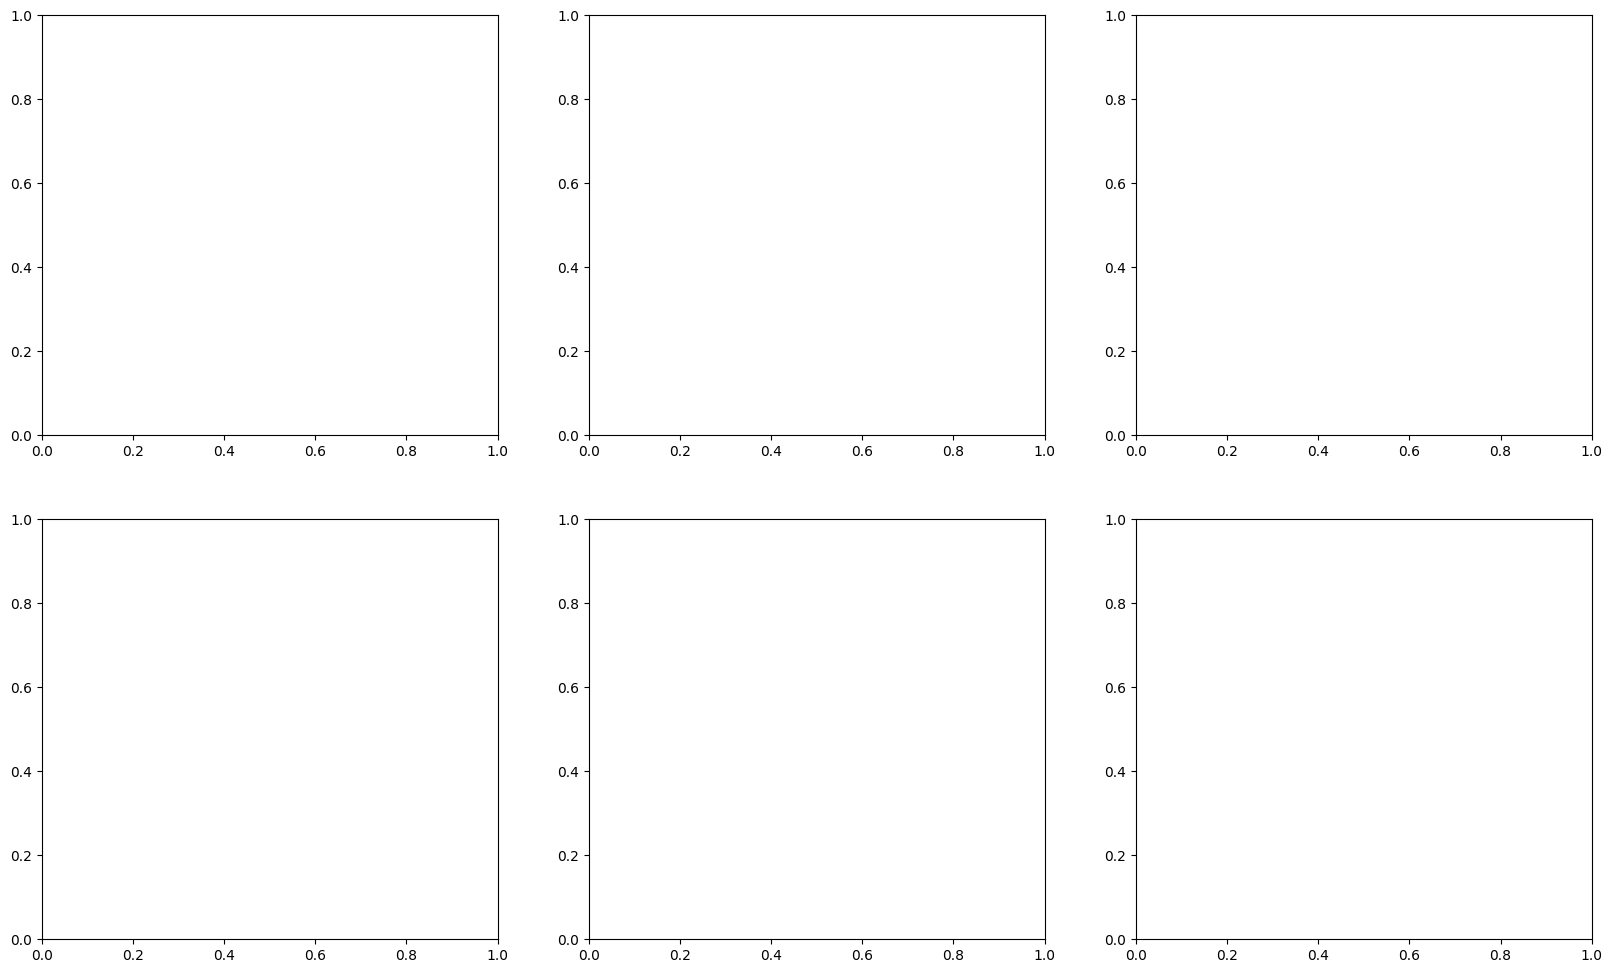

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='bathrooms',y='price',data=housing)
plt.subplot(2,3,2)
sns.boxplot(x='bedrooms',y='price',data=housing)
plt.subplot(2,3,3)
sns.boxplot(x='basement',y='price',data=housing)
plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating',y='price',data=housing)
plt.subplot(2,3,5)
sns.boxplot(x='airconditioning',y='price',data=housing)
plt.subplot(2,3,6)
sns.boxplot(x='furnishingstatus',y='price',data=housing)
plt.show()

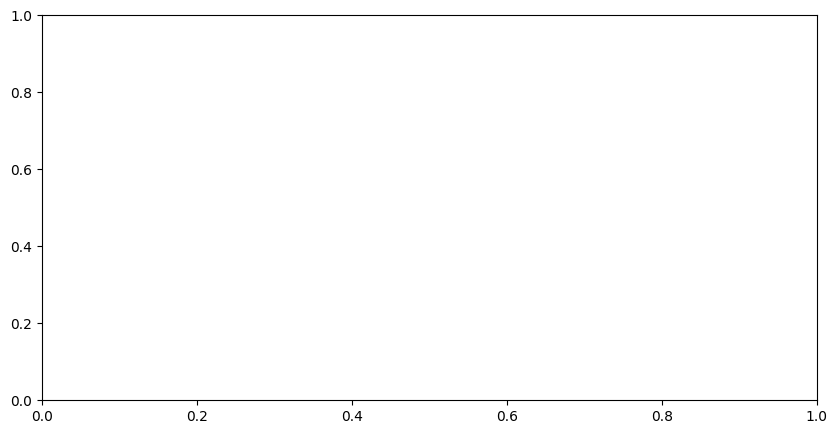

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="bedrooms",y="price",hue="airconditioning",data=housing)
plt.show()

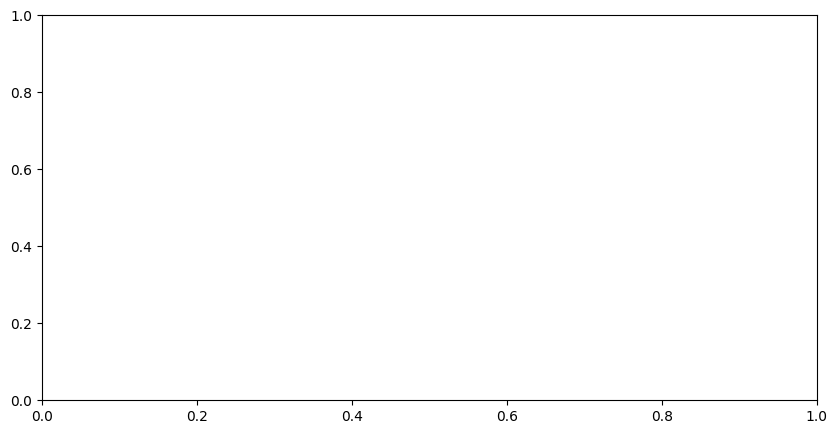

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="bathrooms",y="price",hue="hotwaterheating",data=housing)
plt.show()

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [ ]:
df.rename(columns={"besement": "basement"}, inplace=True)

In [ ]:
import numpy as np
from numpy import reshape
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
l = ['mainroad', "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]

for i in l:
    oe.fit(np.asarray(df[i]).reshape(-1, 1))
    df[i] = oe.transform(np.asarray(df[i]).reshape(-1, 1))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    float64
 6   guestroom         545 non-null    float64
 7   basement          545 non-null    float64
 8   hotwaterheating   545 non-null    float64
 9   airconditioning   545 non-null    float64
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    float64
 12  furnishingstatus  545 non-null    float64
dtypes: float64(7), int64(6)
memory usage: 55.5 KB


In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,0.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,0.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,0.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1.0,0.0,1.0,0.0,0.0,2,0.0,2.0
541,1767150,2400,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0
542,1750000,3620,2,1,1,1.0,0.0,0.0,0.0,0.0,0,0.0,2.0
543,1750000,2910,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [ ]:
df["area"].describe()

count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64

In [ ]:
cols = ["area", "price", "bedrooms", "bathrooms", "stories", "parking"]
for col in cols:
 upper_limit = df[col].quantile(0.99)
lower_limit = df[col].quantile(0.01)
df[col] = np.where(df[col] > upper_limit,
                       upper_limit,
                       np.where(df[col] < lower_limit,
                                lower_limit,
                                df[col]))

In [ ]:
corr_matrix=df.corr()
corr_matrix

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


In [ ]:
corr_matrix["price"].sort_values(ascending=False)

price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
furnishingstatus   -0.304721
Name: price, dtype: float64

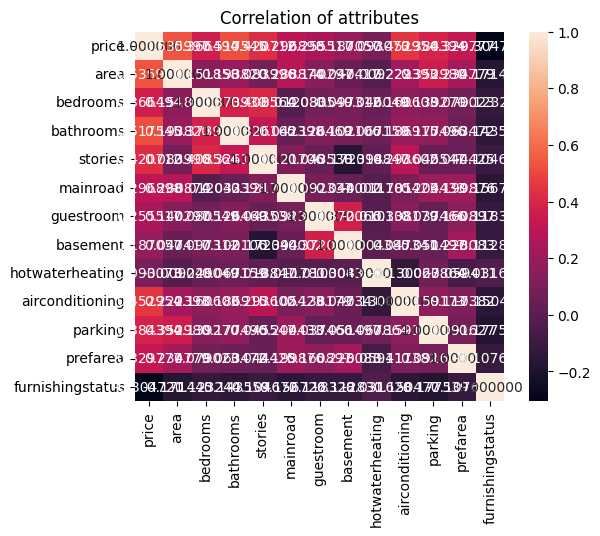

In [ ]:
plt.title("Correlation of attributes")
a=sns.heatmap(corr_matrix,square=True,annot=True,fmt="1f",linecolor="maroon")

In [ ]:
df.drop("hotwaterheating",axis=1,inplace=True)

In [ ]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [ ]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1.0,0.0,0.0,1.0,2.0,1.0,0.0
1,8960,4,4,4,1.0,0.0,0.0,1.0,3.0,0.0,0.0
2,9960,3,2,2,1.0,0.0,1.0,0.0,2.0,1.0,1.0
3,7500,4,2,2,1.0,0.0,1.0,1.0,3.0,1.0,0.0
4,7420,4,1,2,1.0,1.0,1.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1.0,0.0,1.0,0.0,2.0,0.0,2.0
541,2400,3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,3620,2,1,1,1.0,0.0,0.0,0.0,0.0,0.0,2.0
543,2910,3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(381, 11) (164, 11) (381,) (164,)


In [ ]:
ridge=Ridge(alpha=1.0)
ridge.fit(xtrain,ytrain)
ridge_predictions=ridge.predict(xtest)

ridge_predictions

array([ 2785237.91508313,  3788381.24587578,  6150349.27965953,
        3911043.8638565 ,  6757599.27024827,  7041863.19642407,
        3658313.8129505 ,  3243416.69509972,  5436288.76507725,
        3128998.065632  ,  5046019.72613507,  2265329.73780514,
        4244285.63709458,  4509959.27486719,  6724096.79722715,
        2805348.69628191,  7404705.49496813,  6302363.09792663,
        5239022.2559913 ,  4386350.53371177,  2660878.90003401,
        2087653.98550429,  5932576.5317069 ,  5454037.98879734,
        6707560.168082  ,  6022410.69787612,  3784139.6535346 ,
        3791063.20812701,  3627324.2180701 ,  3847628.07643707,
        4494127.90403015,  5126969.95572273,  5697059.49287935,
        5566979.03398033,  7541072.0631404 ,  5251814.11421271,
        6660484.6680058 ,  2472155.61788384,  5342415.73612795,
        5518661.18629889,  4952690.35738992,  5373847.55798462,
        2998209.92494768,  6395091.89517989,  5843419.68596345,
        7930072.13384238,  8462322.39137

In [ ]:
r2=r2_score(ytest,ridge_predictions)
print(r2)

0.7385283681408653


In [ ]:
model=LinearRegression()
model.fit(xtrain,ytrain)
ypre=model.predict(xtest)

In [ ]:
ypre

array([ 2773251.869111  ,  3784445.18992963,  6153390.46616503,
        3901321.34039428,  6754286.08104382,  7050204.69351242,
        3648932.7178788 ,  3231185.46479245,  5446967.76421326,
        3128932.43184934,  5046279.44438842,  2255136.09660016,
        4254023.72969727,  4513396.78811369,  6731735.39144117,
        2795133.63414714,  7408659.70770433,  6309652.38251358,
        5242091.30454781,  4373425.31774057,  2659108.70315211,
        2078816.09397686,  5915858.36672513,  5457849.8039679 ,
        6715065.40136717,  6033132.80213861,  3780136.72184785,
        3783431.63072399,  3632773.71022467,  3845798.73103737,
        4502383.70371469,  5132502.05384839,  5688532.58453673,
        5568962.68978287,  7547556.3663299 ,  5245041.74000123,
        6673263.95972137,  2461232.04031105,  5342032.43992988,
        5534407.94469449,  4959147.06985063,  5359508.38866675,
        2996040.47296727,  6417628.93142578,  5854044.23535888,
        7937284.41993392,  8448641.71891

In [ ]:
model.coef_

array([ 2.43200004e+02,  1.75680857e+05,  8.72539741e+05,  4.60386918e+05,
        4.05188607e+05,  2.16579638e+05,  4.67934252e+05,  8.53124335e+05,
        3.48493594e+05,  6.66937032e+05, -2.16743974e+05])

In [ ]:
model.score(xtest,ytest)

0.73837431350953

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(ytest,ypre)
print(r2)

0.73837431350953


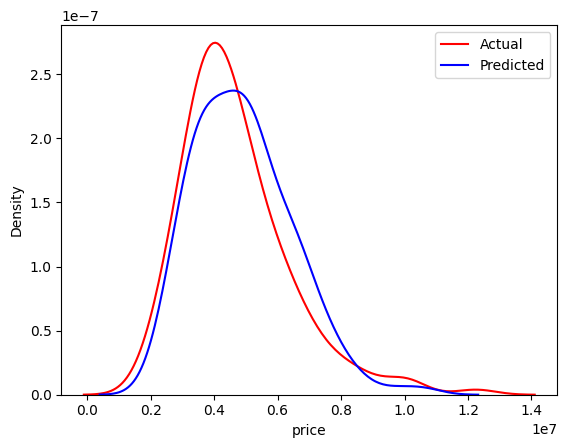

In [ ]:
sns.distplot(ytest,hist=False,color="red",label="Actual")
sns.distplot(ypre,hist=False,color="blue",label="Predicted")
plt.legend()
plt.show()

In [ ]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
xtrain.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,5064.372703,2.984252,1.301837,1.821522,0.868766,0.167979,0.338583,0.309711,0.650919,0.217848,1.070866
std,2044.695057,0.750273,0.503380,0.873383,0.338100,0.374339,0.473850,0.462983,0.834412,0.413326,0.766205
min,1700.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3600.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6240.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000
max,15600.000000,6.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [84]:
print(r2_score(ytest,ypre))

0.73837431350953


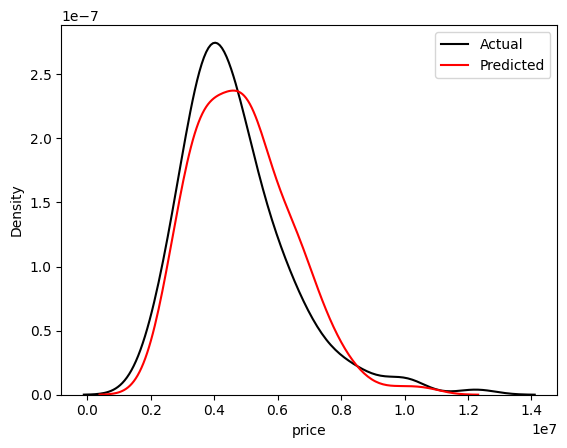

In [90]:
sns.distplot(ytest,hist=False,color="Black",label="Actual")
sns.distplot(ypre,hist=False,color="Red",label="Predicted")
plt.legend()
plt.show()

Conclusion



*  Linear Regression for Predicting house prices
*   r2_score:0.7292983746958296
*   The model has an R-sqared(R^2) value of 0.729, which indicates approximately 72% of the variability in the house prices can be explained by the model.




